### Name : Ayodya W.K.H
### Index No : 190065K

### Question 1
Show derivative of Gaussian filters as surface plot.

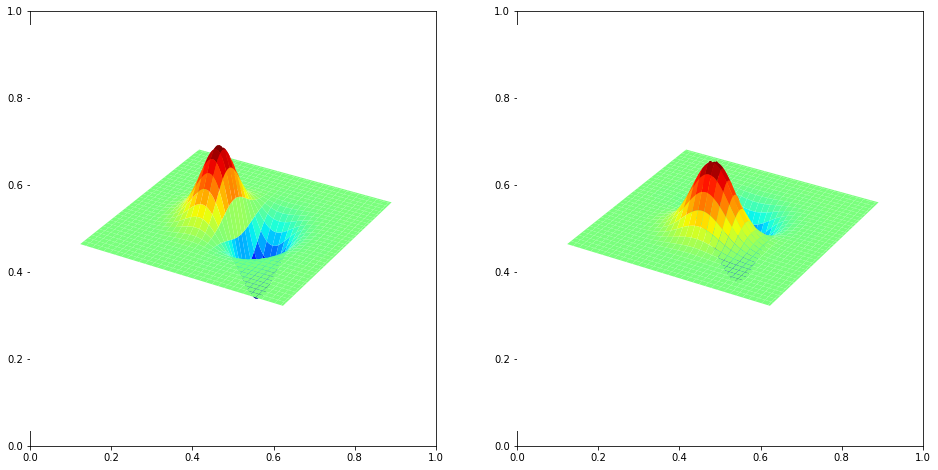

In [37]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

sigma = 1
X = np.arange(-5, 5.1, 0.1)
Y = np.arange(-5, 5.1, 0.1)
X,Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2)/(2*sigma**2)) #*(1/(2*np.pi*sigma**2))

kernel_1 = np.array([[0,0,0],[-1,0.,1],[0,0,0]], dtype = np.float64)
Zx = cv.filter2D(Z, -1, kernel_1)
kernel_2 = np.array([[0,-1.,0],[0,0.,0],[0,1.,0]], dtype = np.float64)
Zy = cv.filter2D(Z, -1, kernel_2)

fig,ax = plt.subplots(1,2,figsize = (16,8))
ax1 = fig.add_subplot(121, projection = '3d')
ax2 = fig.add_subplot(122, projection = '3d')

surface1 = ax1.plot_surface(X, Y, Zx, cmap = cm.jet, linewidth = 0 , antialiased = True)
surface2 = ax2.plot_surface(X, Y, Zy, cmap = cm.jet, linewidth = 0 , antialiased = True)

ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

cset = ax1.contourf(X, Y, Zx, zdir = 'z', offset = np.min(Z)-1.5 , cmap = cm.jet)
#ax1.set_zlim(np.min(Zx)-2, np.max(Zx))
cset = ax2.contourf(X, Y, Zy, zdir = 'z', offset = np.min(Z)-1.5 , cmap = cm.jet)
#ax2.set_zlim(np.min(Zy)-2, np.max(Zy))

ax1.axis('off')
ax2.axis('off')
plt.show()

### Question 2
Detect Harris corners using the OpenCV’s existing function.

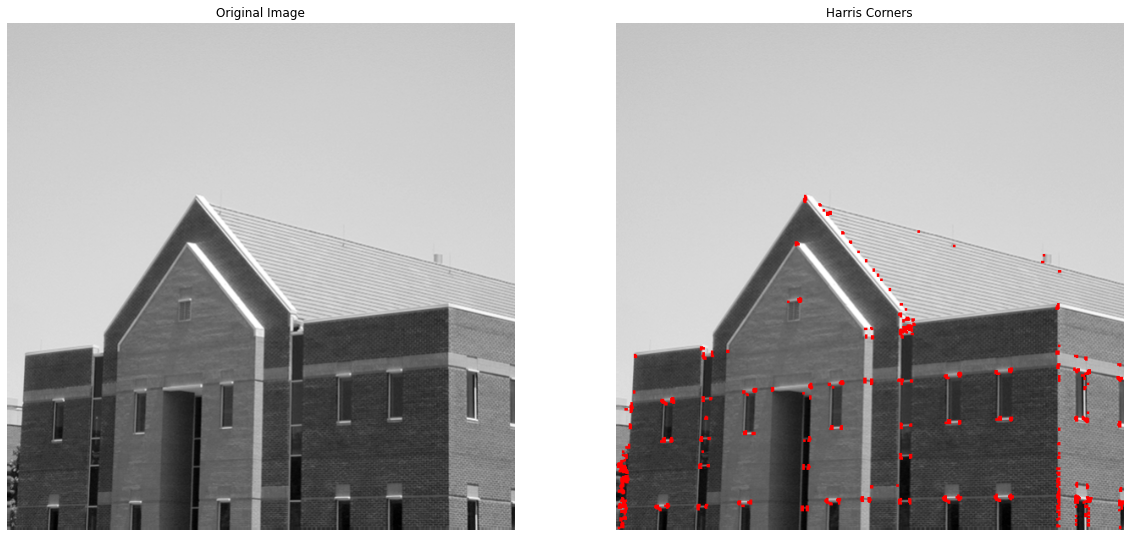

In [89]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Img = cv.imread('building.tif', cv.IMREAD_COLOR)
assert Img is not None

Copy_Img = np.copy(Img)
Gray_Img = cv.cvtColor(Img, cv.COLOR_BGR2GRAY)
Gray_Img = np.float32(Gray_Img)

dst = cv.cornerHarris(Gray_Img, 2, 3, 0.04)
dst = cv.dilate(dst, None)

Copy_Img[dst > 0.01 * dst.max()] = [0, 0, 255]

figure, axis = plt.subplots(1,2, figsize = (20,20))
axis[0].imshow(cv.cvtColor(Img, cv.COLOR_BGR2RGB))
axis[0].axis('off')
axis[0].title.set_text('Original Image')
axis[1].imshow(cv.cvtColor(Copy_Img, cv.COLOR_BGR2RGB))
axis[1].axis('off')
axis[1].title.set_text('Harris Corners')
plt.show()

### Question 3
Detect Harris corners using your own implementation.

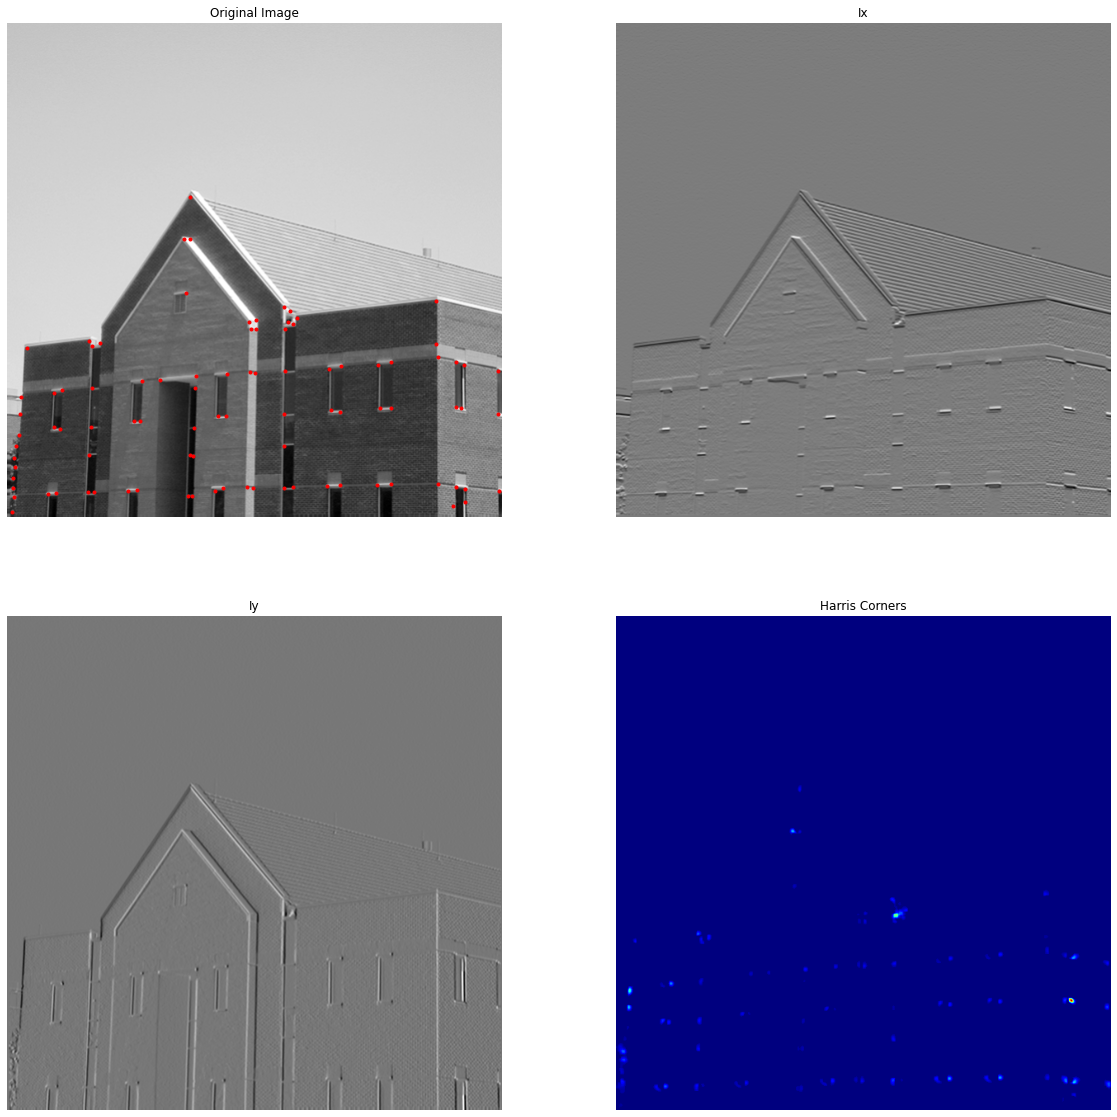

In [115]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

Img = cv.imread('building.tif', cv.IMREAD_COLOR)
assert Img is not None

Gray_Img = cv.cvtColor(Img, cv.COLOR_BGR2GRAY)
Gray_Img = np.float32(Gray_Img)

kernel_h = np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype = 'float32')
kernel_v = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype = 'float32')

Ix = cv.filter2D(Gray_Img, -1, kernel_h)
Iy = cv.filter2D(Gray_Img, -1, kernel_v)

sigma = 3
ksize = 7
m11 = cv.GaussianBlur(Ix*Ix, (ksize,ksize), sigma)
m12 = cv.GaussianBlur(Ix*Iy, (ksize,ksize), sigma)
m21 = m12
m22 = cv.GaussianBlur(Iy*Iy, (ksize,ksize), sigma)

det = m11*m22 - m12*m21
trace = m11 + m22
alpha = 0.04
R = det - alpha*trace**2
R[ R < 1e8] = 0
coordinates = peak_local_max(R, min_distance = 2)

figure, axis = plt.subplots(2,2, figsize = (20,20))

axis[0,0].imshow(Img, cmap = 'gray')
axis[0,0].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
axis[0,0].axis('off')
axis[0,0].title.set_text('Original Image')
axis[0,1].imshow(Ix+127, cmap = 'gray')
axis[0,1].axis('off')
axis[0,1].title.set_text('Ix')
axis[1,0].imshow(Iy+127, cmap = 'gray')
axis[1,0].axis('off')
axis[1,0].title.set_text('Iy')
axis[1,1].imshow(R+127, cmap = cm.jet)
axis[1,1].axis('off')
axis[1,1].title.set_text('Harris Corners')

plt.show()

### Question 4
Detect Canny edges using the OpenCV’s existing function.

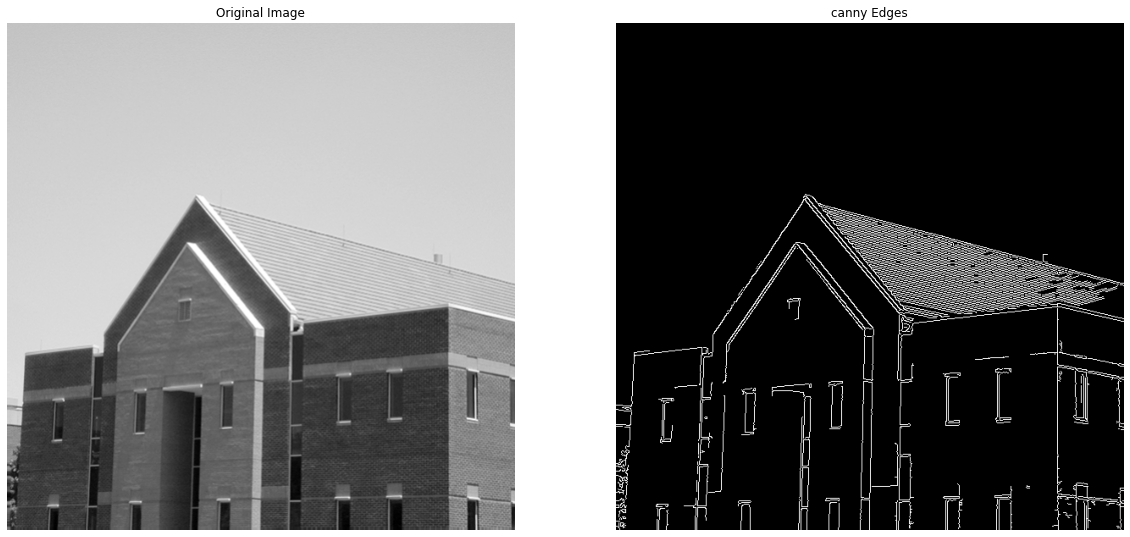

In [53]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Img = cv.imread('building.tif',cv.IMREAD_GRAYSCALE)
assert Img is not None

edges = cv.Canny(Img,100, 200)
figure, axis = plt.subplots(1,2, figsize = (20,20))

axis[0].imshow(cv.cvtColor(Img, cv.COLOR_BGR2RGB))
axis[0].axis('off')
axis[0].title.set_text('Original Image')
axis[1].imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))
axis[1].axis('off')
axis[1].title.set_text('canny Edges')

plt.show()

### Question 5
Match SIFT features between two images in the Graffiti sequence.